# **Notebook used for Training YOLO V5 for ObjectDetection**

*   If you just want to see the model performance, run the first cell and go to the last cell.

*   If you want to retrain the model by yourself run the cells one by one.
if you want to try training the model by yourself, please use the GPU environment in colab.    


In [6]:
!git clone https://github.com/theUnrealSamurai/simple_classifier.git

Cloning into 'simple_classifier'...
remote: Enumerating objects: 1959, done.
remote: Counting objects: 100% (643/643), done.
remote: Compressing objects: 100% (506/506), done.
remote: Total 1959 (delta 108), reused 623 (delta 88), pack-reused 1316
Receiving objects: 100% (1959/1959), 371.00 MiB | 30.08 MiB/s, done.
Resolving deltas: 100% (112/112), done.
Updating files: 100% (1889/1889), done.


In [ ]:
# Generating artificial dataset for training the model.

!mkdir /content/slot_machines # creating directory to store the generated images.
!python3 /content/simple_classifier/object_detection/data/data_generator.py --base_path "/content/slot_machines" --img_size 640 --n 500

# img_size is the size of image. 416 x 416 is used here.
# n represents the number of images you want to generate. 500 images generated in this case.
# base path is where you want to store the images.

# The generated images are automatically stored in the yolo format. inside the
# base directory, 2 folders will be created images and labels.
# inside the images directory the images will be stored.
# inside the lables direcotry the labels will be stored in a text file.
# the format for this text files is
# [class_index x_center y_center length width]
# each line contains bounding box for one object.

100% 500/500 [01:48<00:00,  4.61it/s]


In [2]:
# I am using the yolov5 model from this repository
!git clone https://www.github.com/ultralytics/yolov5

Cloning into 'yolov5'...
remote: Enumerating objects: 15957, done.
remote: Counting objects: 100% (77/77), done.
remote: Compressing objects: 100% (52/52), done.
remote: Total 15957 (delta 40), reused 50 (delta 25), pack-reused 15880
Receiving objects: 100% (15957/15957), 14.70 MiB | 21.81 MiB/s, done.
Resolving deltas: 100% (10939/10939), done.


In [3]:
!pip3 install -r /content/yolov5/requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.8/188.8 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 616.3/616.3 kB 21.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 7.6 MB/s eta 0:00:00


In [ ]:
# Using the tools inside the repository to train the model for object detection.

# img is the image size. we are using 416. It can be anything but it has to be a multiple of 32.
# the data for the model is fed using a yaml file. The path to the file is given in the below command.
# weights we are using a pretrained yolo model. i.e. yolov5n

# the model is available in different sizes [YOLOv5n, YOLOv5s, YOLOv5m, YOLOv5l, YOLOv5x]
# [nano, small, medium, large, Xlarge] each alphabet in the above list represent this.
# we will be using the nano model. since our task is very simple. I might change this later on based on performance.

%cd /content/yolov5
!python3 train.py --img 416 --epochs 60 --data /content/simple_classifier/object_detection/data/annotated_images/data.yaml --weights yolov5s.pt

/content/yolov5
train: weights=yolov5s.pt, cfg=, data=/content/simple_classifier/object_detection/data/annotated_images/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=60, batch_size=16, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-215-ga6659d0 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw

In [4]:
# Exporting the trained model to torchscript to run it on mobile devices

# !python3 /content/yolov5/export.py --weights /content/yolov5/runs/train/exp/weights/best.pt --include coreml
!python3 /content/yolov5/export.py --weights /content/yolov5/runs/train/exp2/weights/best.pt --include torchscript --img 640


export: data=yolov5/data/coco128.yaml, weights=['/content/yolov5/runs/train/exp2/weights/best.pt'], imgsz=[640], batch_size=1, device=cpu, half=False, inplace=False, keras=False, optimize=False, int8=False, dynamic=False, simplify=False, opset=17, verbose=False, workspace=4, nms=False, agnostic_nms=False, topk_per_class=100, topk_all=100, iou_thres=0.45, conf_thres=0.25, include=['torchscript']
YOLOv5 🚀 v7.0-216-gec690e4 Python-3.10.12 torch-2.0.1+cu118 CPU

Traceback (most recent call last):
  File "/content/yolov5/export.py", line 863, in <module>
    main(opt)
  File "/content/yolov5/export.py", line 858, in main
    run(**vars(opt))
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/_contextlib.py", line 115, in decorate_context
    return func(*args, **kwargs)
  File "/content/yolov5/export.py", line 736, in run
    model = attempt_load(weights, device=device, inplace=True, fuse=True)  # load FP32 model
  File "/content/yolov5/models/experimental.py", line 79, in attempt_

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!cp /content/yolov5/runs/train/exp2/weights/best.torchscript /content/drive/MyDrive/junk

Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2023-9-11 Python-3.10.12 torch-2.0.1+cu118 CPU

Fusing layers... 
Model summary: 157 layers, 7034398 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


          xmin        ymin        xmax        ymax  confidence  class  \
0   287.893402  181.870499  359.404816  283.286774    0.949033      2   
1   467.986816  295.224884  534.304199  402.867279    0.940781      6   
2   112.036942  182.182541  183.554825  277.664459    0.931457      5   
3   459.188660  183.369995  532.139709  277.029083    0.926957      5   
4   118.298271  123.595734  185.710083  169.667755    0.922741      6   
5   290.049957  126.457787  356.558502  171.682068    0.908480      6   
6   111.723618  294.278259  180.295975  404.692688    0.902418      6   
7   348.498688   43.719315  399.910309   86.252441    0.889614      0   
8    94.040627   44.522171  118.711205   81.477219    0.888850      2   
9   286.279907  299.526581  357.441101  396.967010    0.884371      5   
10  203.769257   45.410091  224.444336   80.393631    0.868960      6   
11  300.014282   42.110672  347.324768   85.416229    0.863101      8   
12  455.977844  419.176697  538.263855  517.424561 

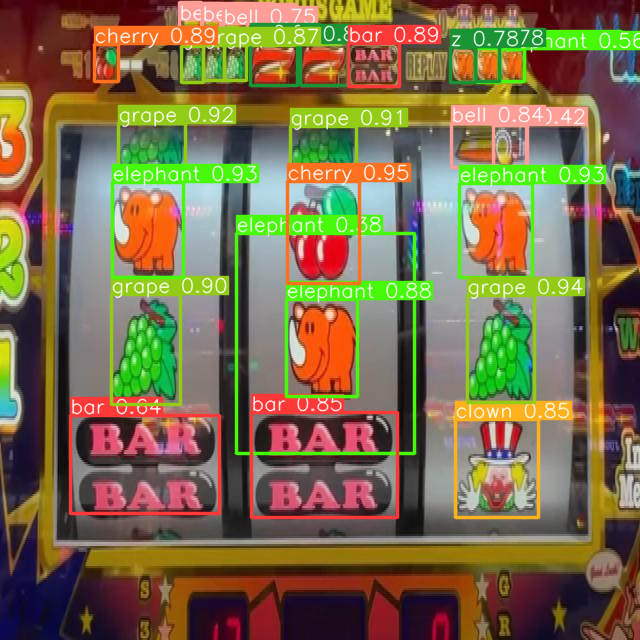

In [9]:
# Once we train the model we can use this code to execute the model and see it's performance.

import torch
from glob import glob

# loading the trained model here.
model = torch.hub.load('ultralytics/yolov5', 'custom', path='/content/simple_classifier/object_detection/trained_model/yolov5_small/yolov5s_mAP938_P861_R893.pt')


# change the path of the image here

test_images = glob("/content/simple_classifier/object_detection/data/test_data/*.png")
valid_images = glob("/content/simple_classifier/object_detection/data/annotated_images/valid/images/*.jpg")

im = valid_images[8] #this list contains all the images. pick a number from 0-14 to choose a picture for testing.


results = model(im)

print(results.pandas().xyxy[0])
results.show()

In [5]:
!rm -r /content/simple_classifier